PCA components:
[[-1.07439989 -0.12195708]
 [ 1.31785652  0.04969764]
 [-0.65207199  0.2131178 ]
 [ 0.40861536 -0.14085835]]
Explained variance ratio: [0.96766892 0.02294785]


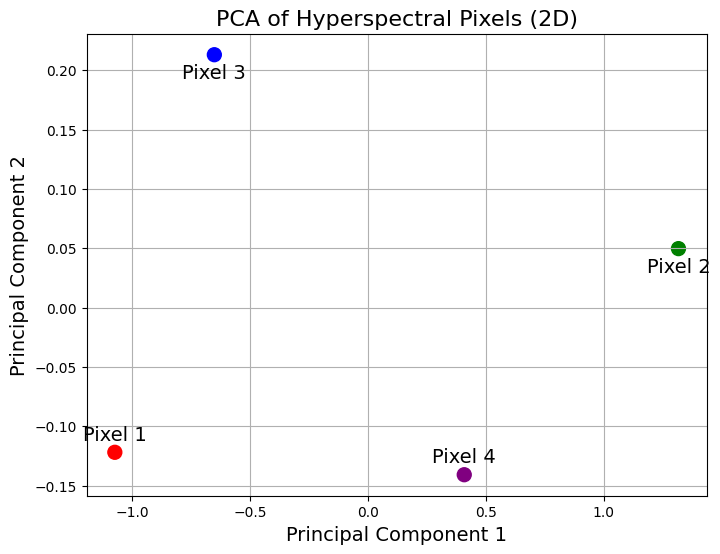

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "data/hyperspec_example.csv"
data = pd.read_csv(file_path, header=None)

# Extract the data: 1st row is wavelengths, remaining rows are reflectance values
wavelengths = data.iloc[0, :].values
reflectance_data = data.iloc[1:, :].values

# Transpose the reflectance data to have pixels as rows and bands as columns
# reflectance_data_transposed = reflectance_data.T

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(reflectance_data)

print("PCA components:")
print(pca_result[:, :2])  # Print first 2 components
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the 4 pixels in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=['red', 'green', 'blue', 'purple'], s=100)
plt.title("PCA of Hyperspectral Pixels (2D)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)

# Annotate each point with its pixel number
for i, pixel in enumerate(pca_result):
    plt.annotate(f'Pixel {i+1}', (pixel[0], pixel[1] - 0.02 if pixel[1] > 0 else pixel[1] + 0.01), fontsize=14, ha='center')

plt.grid(True)
plt.show()
